**Importação Inicial**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import statsmodels.api as sma
import numpy as np



---



# **Exploração dos dados**

## Análise inicial dos dados

In [ ]:
dataset = pd.read_csv("insurance.csv")

*Verificando* os 5 primeiros registros da lista de dados

In [ ]:
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Dataset possui 7 colunas:

Age -> Idade do usuário

1.   sex (Masculino ou feminino)
2.   bmi (IMC do usuário)
1.   children (Quantidade de filhos)
2.   smoker (Fumante ou não fumante)
1.   region (região dos Estados Unidos divido em: northeast, southeast, southwest, northwest)
2.   southeast (IMC do usuário)
1.   charges (Custos médicos anuais do usuário do dataset)

In [ ]:
import numpy as np
np.random.seed(42)
import os

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [ ]:
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Verificando a quantidade de linhas e colunas da lista de dados

## Analisando as colunas categoricas

Verificando as informações que temos na coluna "sex"

In [ ]:
set(dataset["sex"])

{'female', 'male'}

Verificando as informações que temos na coluna "smoker"

In [ ]:
set(dataset["smoker"])

{'no', 'yes'}

Verificando as informações que temos na coluna "region"

In [ ]:
set(dataset["region"])

{'northeast', 'northwest', 'southeast', 'southwest'}

Verificando a quantidade de registros que temos para cada informação do campo
"sex"

In [ ]:
dataset["sex"].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

Verificando a quantidade de registros que temos para cada informação do campo
"sex"

In [ ]:
dataset["smoker"].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

Verificando a quantidade de registros que temos para cada informação do campo
"sex"

In [ ]:
dataset["region"].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [ ]:
dataset.shape

(1338, 7)

Verificando o tipo de dados de cada coluna e se existem dados nulos

## Analisando as colunas numéricas

Verificando os dados estatísticos das colunas numéricas  

In [ ]:
dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Realizando a análise das informações:
1.   É possivel observar que não existem valores nulos na lista, pois o valor de count de todas as colunas é o mesmo valor que vimos quando realizamos o datashape (1338 registros) da lista;
2.   (age)Todos as pessoas são maiores de 18 anos(min) e com menos de 64 anos(max), é provável que pessoas fora desse intervalo de idade não terão um cálculo preciso no nosso modelo;
*   IMC Médio de 30.66. Pelos quartis nota-se que pelo menos 75% do dataset são de pessoas que estão no sobrepeso (IMC acima de 25).





Gerando o histograma para realizar uma análise da distribuição dos dados numericos

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'children'}>,
        <Axes: title={'center': 'charges'}>]], dtype=object)

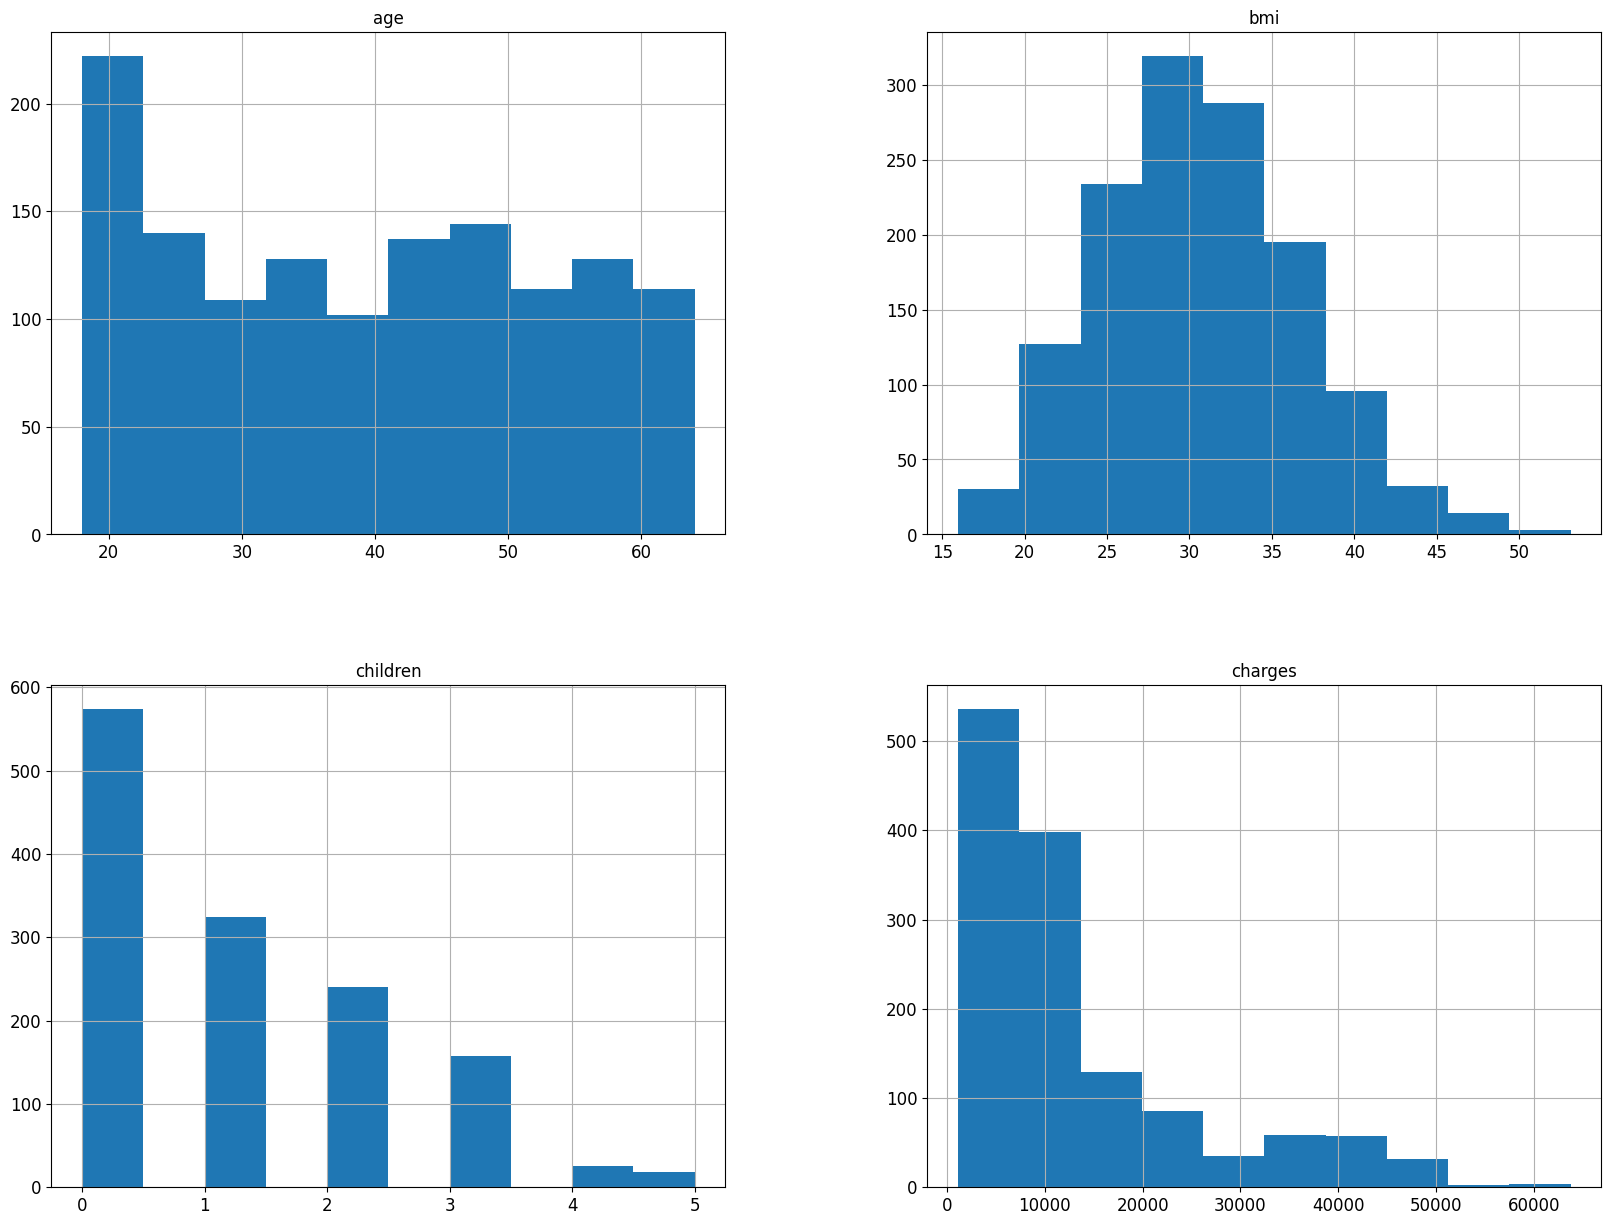

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
dataset.hist(figsize=(20,15))

Realizando a análise do histograma é possivel observar que:

1.   Temos uma concentração maior de pessoas com menos de 20 anos (age), para as outras idades está distribuido de forma quase igualitária;
2.   No bmi, a concentração de pessoas com sobrepeso e obesos é mais alta do que pessoas saudáveis (bmi entre 25 e 29.9 é sobrepeso e maior que 30 obeso);
3.   Temos uma maior concentração de valores (charges) abaixo de U$ 15.000;

Observando os histogramas das variáveis Charges, Children e Age não possuem uma distribuição normalizada. Além disso, é observado outliers de BMI (IMC), assim como outliers e uma distribuição não homogenea da variável target. Análisando o problema o comportamento, é possível extrair que as despesas médicas não crescem de forma linear. Este comportamento é importante ser mantido, uma vez que, a medida em que, envelhecemos ou comorbidades de saude existem, a quantidade de tratamento médico, internação, etc tende a aumentar.




## Analisando a amplitude dos dados numéricos

Analisando a coluna AGE

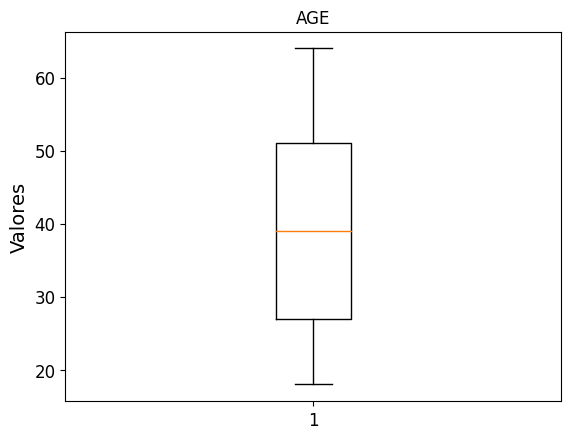

In [ ]:
plt.boxplot(dataset["age"])
plt.title("AGE")
plt.ylabel("Valores")
plt.show()

Nessa coluna não temos outliers e os dados estão aparentemente simétricos, o whisker de cima está um pouco maior que o de baixo

Analisando a coluna BMI

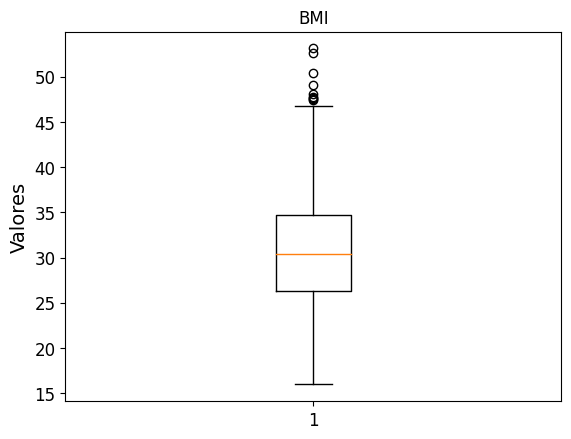

In [ ]:
plt.boxplot(dataset["bmi"])
plt.title("BMI")
plt.ylabel("Valores")
plt.show()

É possivel observar que temos alguns outliers aproximadante acima de 46. Existe uma certa simetria nos dados;

Analisando a coluna Children

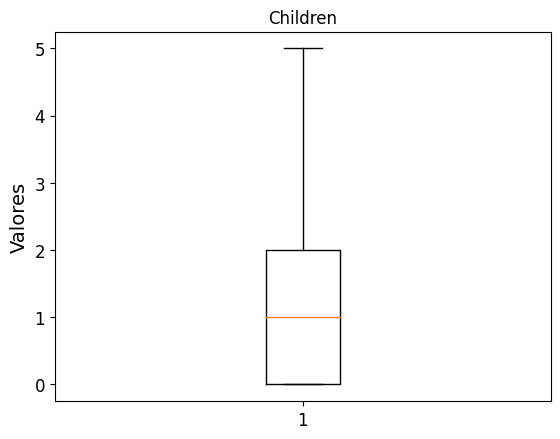

In [ ]:
plt.boxplot(dataset["children"])
plt.title("Children")
plt.ylabel("Valores")
plt.show()

Vemos que nessa coluna não temos outliers e os dados são assimétricos

Analisando a coluna Charges nossa variável target

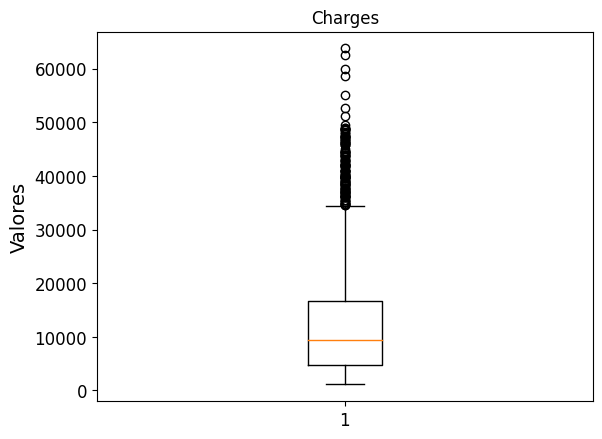

In [ ]:
plt.boxplot(dataset["charges"])
plt.title("Charges")
plt.ylabel("Valores")
plt.show()

Nessa coluna temos muitos outliers, observando o whisker de cima está maior que o de baixo e a mediana não está centralizada, podemos concluir que estes dados não estão simétricos.



---



## **Pre Processamento dos Dados**

Armazenando os valores das colunas categoricas em variáveis, aplicando a técnica de one hot enconding:

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
col_enc = ['sex','smoker']
for enc in col_enc:
  dataset[enc] = label_encoder.fit_transform(dataset[enc])

dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [ ]:
#utilizando hot encoding para categorias não binárias
region_enc = pd.get_dummies(dataset['region'], prefix='region',dtype=int)


dados_coeded = pd.concat([dataset,region_enc],axis=1)
dados_coeded.drop(['region'],axis=1, inplace=True)
dados_coeded.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0


Tratar valores categoricos

**Gerando a correlação**

<Axes: >

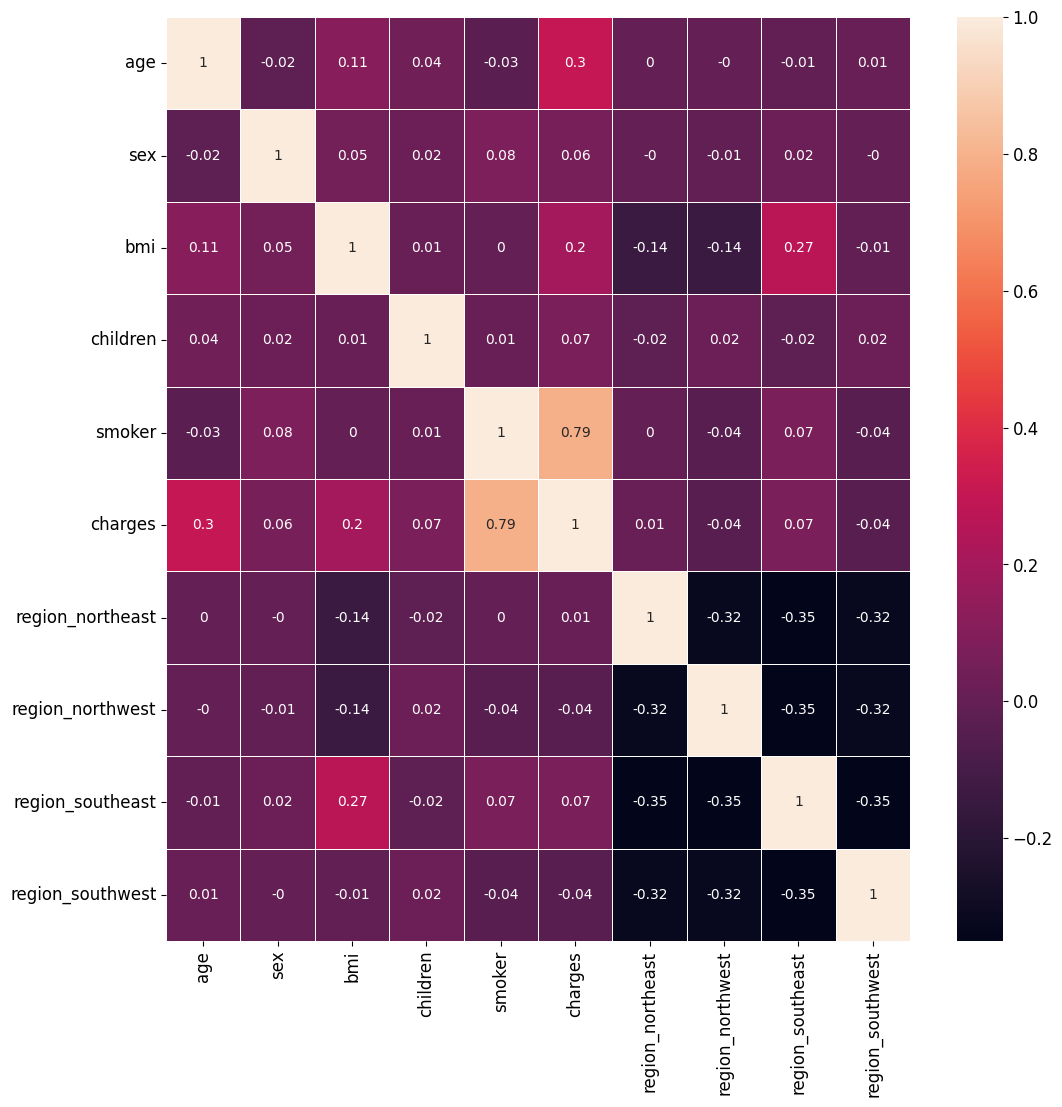

In [ ]:
import seaborn as sb
correlation_matrix = dados_coeded.corr().round(2)

fig, ax = plt.subplots(figsize=(12,12))
sb.heatmap(data=correlation_matrix, annot=True, linewidths=.5, ax=ax)

Vemos que a informação que se destaca é a correlação entre o encargos (Charges) e se a pessoa fuma (Smoke_yes) ou não (Smoke_no). No caso de a pessoa fumar, os encargos aumentam (correlação positiva), e se a pessoa não fumar os encargos diminuem (corelação negativa). Temos também uma correlação positiva moderada do Encargo(Charges) com a idade (Age) e o IMC (Bmi).

O problema em questão tem como objetivo prever a variável charge (target) dada um conjunto de informações do usuário. Neste caso, avaliando o correlacionamento das variáveis, nota-se que no geral, a região do país não apresenta uma correção forte com a variável. Neste caso, a variável que mais se destacou foi o dado se é fumante, seguido por idade e posteriormente pelo IMC (BMI).  Uma curiosidade do dataset é que a região sudeste apresentou uma correlação com o dado do IMC, indicado que existem pessoas de IMC maior nesta região.



**Gerando Dispersão**

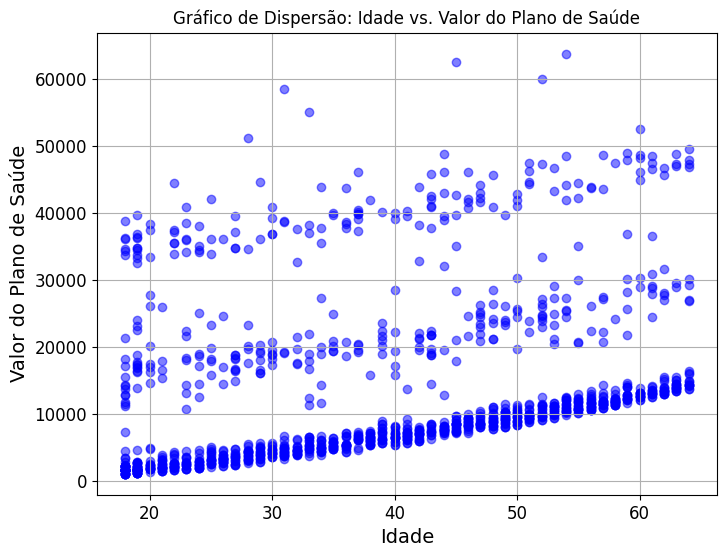

In [ ]:
import matplotlib.pyplot as plt

age = dataset['age']  # lista/array com os valores da característica idade
insurance_cost = dataset['charges']  # lista/array com os valores do valor do plano de saúde

# Criar o gráfico de dispersão
plt.figure(figsize=(8, 6))
plt.scatter(age, insurance_cost, color='blue', alpha=0.5)  # Plotar os pontos de dispersão
plt.title('Gráfico de Dispersão: Idade vs. Valor do Plano de Saúde')
plt.xlabel('Idade')
plt.ylabel('Valor do Plano de Saúde')
plt.grid(True)  # Adicionar grade ao gráfico (opcional)
plt.show()

Nota-se que há uma relação linear entre a idade e o valor do plano de saúde. Uma das suposições é que os valores dipersos acima, são fatores influenciados pelas outras variáveis caracteristicas como fumante e IMC.

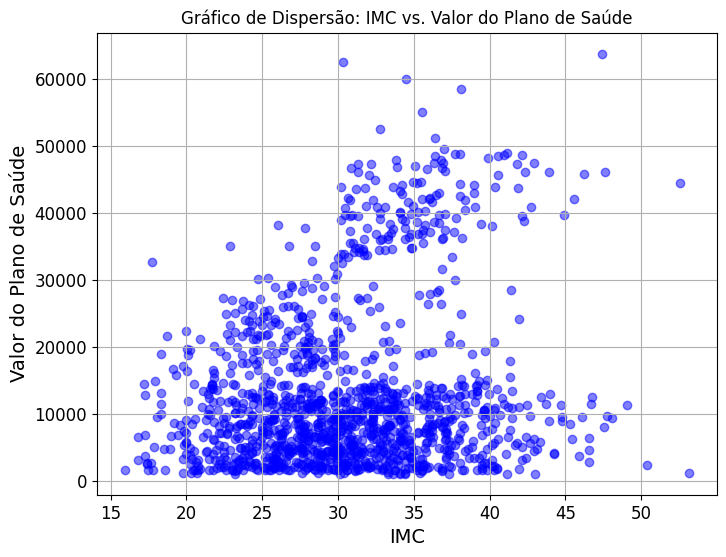

In [ ]:

bmi = dataset['bmi']  # lista/array com os valores da característica imc
insurance_cost = dataset['charges']  # lista/array com os valores do valor do plano de saúde

# Criar o gráfico de dispersão
plt.figure(figsize=(8, 6))
plt.scatter(bmi, insurance_cost, color='blue', alpha=0.5)  # Plotar os pontos de dispersão
plt.title('Gráfico de Dispersão: IMC vs. Valor do Plano de Saúde')
plt.xlabel('IMC')
plt.ylabel('Valor do Plano de Saúde')
plt.grid(True)  # Adicionar grade ao gráfico (opcional)
plt.show()

No caso do IMC, nota-se que há uma concentração da amostra entre 25 a 35.

# **Modelagem e Treinamento**



---



# **Regressão Linear**

Para avaliar a performance, será aplicado o algoritmo de regssão multipla utilizando 2 cenários:
1° Aplicando em todas as variáveis
2° Apenas com as variaveis de forte relação apenas (bmi, smoker e age)

**Cenário 1: Todas as variaveis**

In [115]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

x_all = dados_coeded.drop(['charges'], axis = 1)
y_all = dados_coeded.charges
#Separando os dados de Treino e Teste
x_train_all, x_test_all, y_train_all, y_test_all = train_test_split(x_all, y_all, test_size=0.2, random_state=0)

lr_all = LinearRegression()
lr_all.fit(x_train_all,y_train_all)



previsoes_all = lr_all.predict(x_test_all)



# Avaliando o desempenho do modelo
erro_medio_quadratico = mean_squared_error(y_test_all, previsoes)
erro_absoluto_medio = mean_absolute_error(y_test_all, previsoes)
r_quadrado = r2_score(y_test_all, previsoes_all)

print(f'Erro Médio Quadrático: {erro_medio_quadratico}')
print(f'Erro Absoluto Médio: {erro_absoluto_medio}')
print(f'R² (coeficiente de determinação): {r_quadrado}')


Erro Médio Quadrático: 31827950.229523845
Erro Absoluto Médio: 3933.272649405236
R² (coeficiente de determinação): 0.7999876970680433


**Cenário 2: Variaveis de forte relação (bmi,smoker e age)**

In [124]:
x_forte = dados_coeded[['bmi','smoker','age']]
y_forte = dados_coeded.charges
#Separando os dados de Treino e Teste
x_train_forte, x_test_forte, y_train_forte, y_test_forte = train_test_split(x_forte, y_forte, test_size=0.2, random_state=0)

lr_forte = LinearRegression()
lr_forte.fit(x_train_forte,y_train_forte)



previsoes_forte = lr.predict(x_test_forte)



# Avaliando o desempenho do modelo
erro_medio_quadratico = mean_squared_error(y_test_forte, previsoes)
erro_absoluto_medio = mean_absolute_error(y_test_forte, previsoes)
r_quadrado = r2_score(y_test_forte, previsoes_forte)

print(f'Erro Médio Quadrático: {erro_medio_quadratico}')
print(f'Erro Absoluto Médio: {erro_absoluto_medio}')
print(f'R² (coeficiente de determinação): {r_quadrado}')


Erro Médio Quadrático: 32693237.938726168
Erro Absoluto Médio: 3960.866619808714
R² (coeficiente de determinação): 0.7945500805653087


Avaliando ambos os resultados, nota-se que a performance dos modelos foram parecidas considerando apenas as variáveis de forte correlação. Uma sugestão, para dataset maiores é reavaliar os mesmos resultados e, caso note-se uma performance parecida, remover as colunas de baixa correlação pensando em reduzir o esforço computacional


# **Validação Estatistica**

P-Value e Intervalo de confiança - todas as variáveis


In [146]:
import statsmodels.api as sm

print("Coefficients from scikit-learn:", lr_all.coef_)



# Fit the model using statsmodels
model_sm = sm.OLS(y_all, x_all).fit()



# Extracting p-values for the coefficients
p_values = model_sm.pvalues
print("P-values for the coefficients:", p_values)

Coefficients from scikit-learn: [ 2.53700500e+02 -1.54637279e+01  3.35962814e+02  4.36910121e+02
  2.36050173e+04  4.83840068e+02  2.23707336e+02 -4.29438766e+02
 -2.78108638e+02]
P-values for the coefficients: age                 7.783217e-89
sex                 6.933475e-01
bmi                 6.498194e-31
children            5.769682e-04
smoker              0.000000e+00
region_northeast    5.579044e-32
region_northwest    1.118908e-33
region_southeast    1.121474e-31
region_southwest    1.234416e-34
dtype: float64


In [141]:
confidence_intervals = model_sm.conf_int()
print("Confidence Interval:", confidence_intervals)

Confidence Interval:                              0             1
age                 233.513778    280.198927
sex                -784.470270    521.841552
bmi                 283.088426    395.298482
children            205.163286    745.837805
smoker            23038.030705  24659.038379
region_northeast -13876.393424 -10000.683728
region_northwest -14230.096361 -10352.908590
region_southeast -15090.599486 -10856.521765
region_southwest -14901.466649 -10895.712486


P-Value - Variaveis de forte correlacionamento

In [145]:
import statsmodels.api as sm

X_with_intercept = sm.add_constant(x_forte)

# Fit the model using statsmodels
model_sm = sm.OLS(y_forte, X_with_intercept).fit()

# Extracting p-values for the coefficients
p_values = model_sm.pvalues
print("P-values for the coefficients:", p_values)

P-values for the coefficients: const     9.208145e-34
bmi       2.418558e-30
smoker    0.000000e+00
age       5.241160e-90
dtype: float64


# **Previsões**

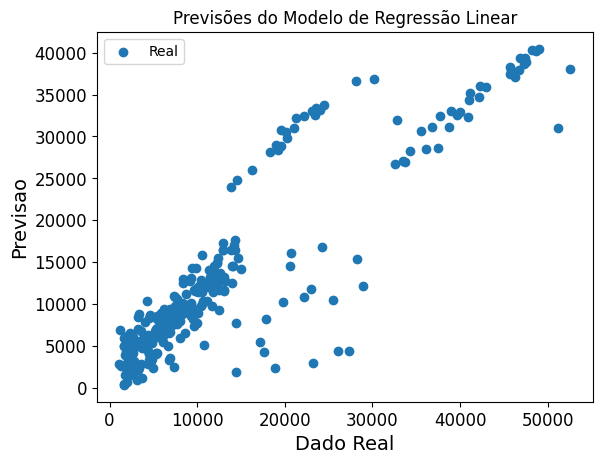

In [147]:
# Visualizando as previsões
plt.scatter(y_test_all,previsoes, label='Real')
plt.xlabel('Dado Real')
plt.ylabel('Previsao')
plt.title('Previsões do Modelo de Regressão Linear')
plt.legend()
plt.show()


Nota-se que as previsoes tiveram uma performance mais próxima do dado real (valores proximos a uma reta) para amostras em que o valor da target estava entre 0 e 20000 e para valores acima de 35000.

# **Conclusão**

O algoritmo apresentou um erro médio absoluto em torno de 80% para ambos os cenários previstos. Uma primeira observação é o baixo volume de dados do Dataset, ou seja, uma possível melhoria seria a coleta de mais dados. Outro ponto importante é referente o mínimo e o maximo encontrado, a faixa do dataset variou de 18 anos a 64 anos, ou seja, para casos fora dessa faixa, seria interessante ter mais amostras pertinentes a este grupo para uso do algoritmo. Vale também mencionar que, o erro medio absoluto pode ser utilizado em conjunto com o dado, ou seja, uma sugestão seria incluir os 4000 de erro na margem de uma possível cotação de plano de saude.
Em relação ao dataset, nota-se também variáveis que não tiveram tanto correlacionamento com a variável target. Este caso pode estar associado a baixa quantidade de dados ou que realmente não há uma relação entre as variáveis caracteristicas e a variavel alvo. Alguns outros aspectos podem ser mencionados, por exemplo, uma correlação levemente maior a fumantes e a região sudoeste. que é a região onde se concentra o Arizona e o Texas. Destaco que, é um dataset de um pouco mais de 1000 linhas, ou seja, esta bem longe de ser representativo para a quantidade de pessoas que residem nos EUA, porém é uma informação que quando análisada, faz sentido.